In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import albumentations as A

In [2]:

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train =  tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [3]:
# Expand the dimensions of the images so that they can be fed into the model
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
x_train.shape

(60000, 28, 28, 1)

In [5]:
(x_test.
shape)

(10000, 28, 28, 1)

In [6]:
augment = A.Compose([
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.2),
])

In [7]:
# Assuming you have your original training data as x_train and y_train
x_train_augmented = []
y_train_augmented = []

# Loop through each image in the training set
for img, label in zip(x_train, y_train):
    augmented_image = augment(image=img.reshape(28, 28))['image'].reshape(28, 28, 1)  # Augment the image
    x_train_augmented.append(augmented_image)  # Add augmented image to the new list
    y_train_augmented.append(label)  # Keep the same label

# Convert lists to numpy arrays
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)


# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Combine original and augmented data
x_train_combined = np.concatenate((x_train, x_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train, y_train_augmented), axis=0)

C:\Users\Patrik (Personal)\Documents\FIIT\BP\DigitsRecognition\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
from sklearn.utils import shuffle
x_train_combined, y_train_combined = shuffle(x_train_combined, y_train_combined)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the combined dataset
model.fit(x_train_combined, y_train_combined, batch_size=32, epochs=3)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)


Epoch 1/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8708 - loss: 0.4334
Epoch 2/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9617 - loss: 0.1219
Epoch 3/3
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9743 - loss: 0.0819
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9673 - loss: 0.0956
Test Accuracy: 0.9732000231742859
Test Loss: 0.07923232764005661


In [10]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9673 - loss: 0.0956


In [11]:
print(accuracy)

0.9732000231742859


In [12]:
print(loss)

0.07923232764005661


In [13]:
model.save('digits_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Prediction for 0 is 5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


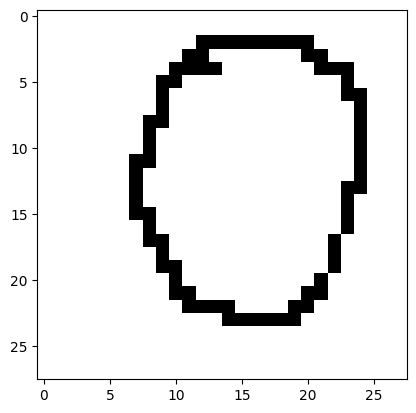

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction for 1 is 9
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


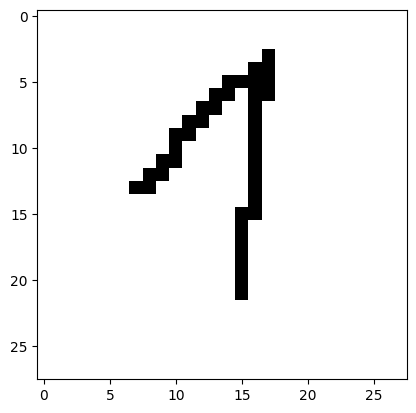

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for 2 is 2
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


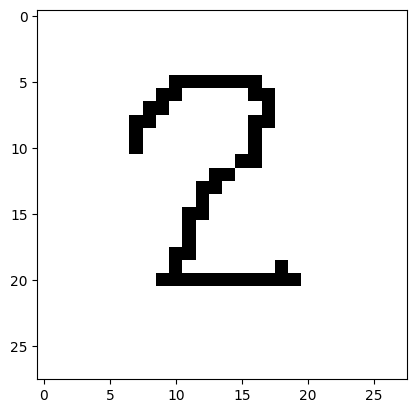

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction for 3 is 3
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


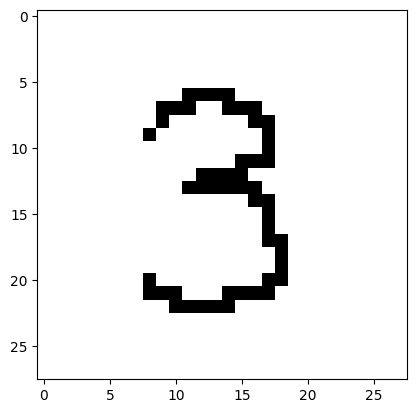

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for 4 is 4
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


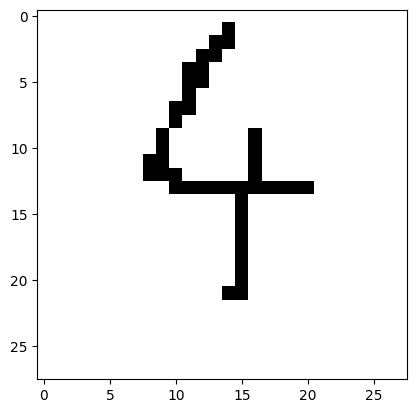

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for 5 is 5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


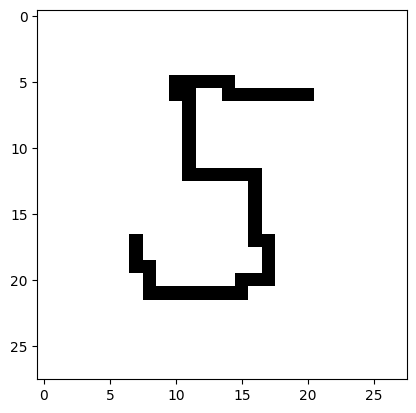

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction for 6 is 6
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


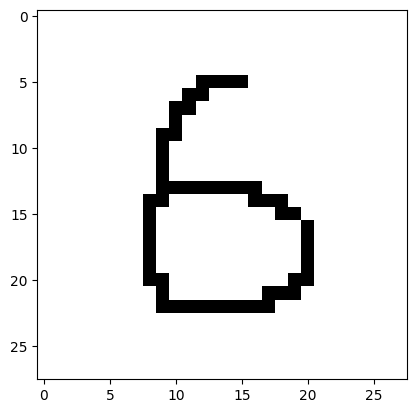

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for 7 is 7
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


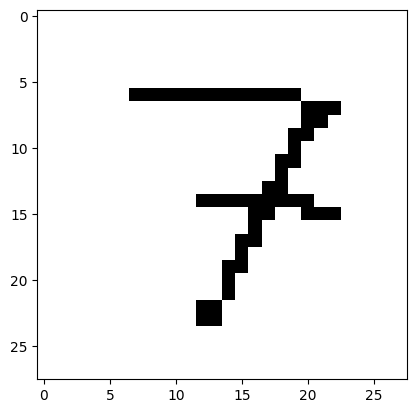

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Prediction for 8 is 8
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


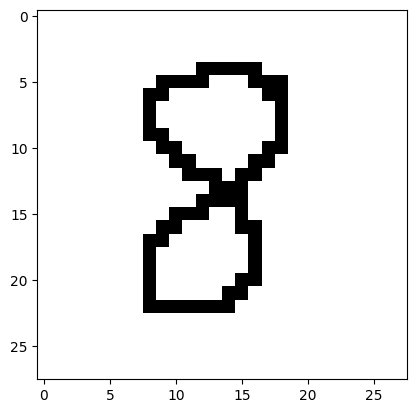

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction for 9 is 3
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


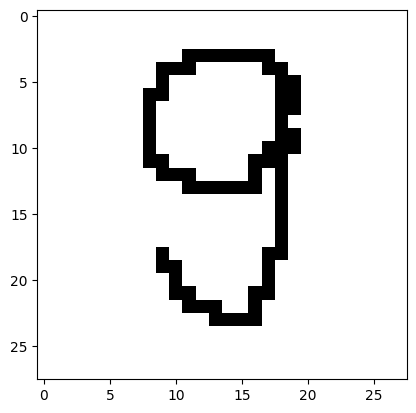

In [26]:
for i in range(10):
    img = cv.imread(f'../MyIMG/{i}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'Prediction for {i} is {np.argmax(prediction)}')
    print(prediction)
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()

In [15]:
import os

print("Current working directory:", os.getcwd())
print("Contents of the image directory:", os.listdir('../MyIMG'))


Current working directory: C:\Users\Patrik (Personal)\Documents\FIIT\BP\DigitsRecognition\CNNs
Contents of the image directory: ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


In [16]:
x_train_combined.shape

(120000, 28, 28, 1)

In [17]:
x_train_augmented.shape

(60000, 28, 28, 1)